In [5]:
# UAE Electricity Consumption Analysis and Forecasting

"""
Project Title: UAE Electricity Consumption Analysis and Forecasting

1. Problem Statement:
   - The goal is to analyze and forecast electricity consumption across different sectors and regions in the UAE.
   - Government agencies, utility companies, and businesses require predictive insights to improve energy management.
   - A reliable forecasting model can help optimize resource allocation and sustainability efforts.

2. Problem-Solving Techniques:
   - **Data Preprocessing**: Cleaned the dataset by renaming columns, encoding categorical variables, handling missing values, and feature scaling.
   - **Feature Engineering**: Created new features such as interaction terms (Emirate * Sector) to capture deeper relationships.
   - **Model Selection & Training**:
     - Tested various models: Random Forest, Gradient Boosting, Linear Regression, and Support Vector Regression.
     - Used GridSearchCV to optimize hyperparameters for the best model.
   - **Model Evaluation**: Measured performance using RMSE, MAE, and R² score.
   - **Feature Importance**: Used SHAP values to interpret and explain model predictions.
   - **Data Visualization**: Created histograms, time-series plots, and residual analysis for insights.

3. Real-World Impact:
   - **Energy Policy & Planning**: Helps governments develop sustainable energy strategies.
   - **Demand Forecasting**: Enables power companies to optimize grid expansion.
   - **Cost Efficiency**: Businesses can better plan power usage and reduce costs.
   - **Sustainability**: Supports eco-friendly initiatives by identifying high-energy-consuming sectors.

"""


'\nProject Title: UAE Electricity Consumption Analysis and Forecasting\n\n1. Problem Statement:\n   - The goal is to analyze and forecast electricity consumption across different sectors and regions in the UAE.\n   - Government agencies, utility companies, and businesses require predictive insights to improve energy management.\n   - A reliable forecasting model can help optimize resource allocation and sustainability efforts.\n\n2. Problem-Solving Techniques:\n   - **Data Preprocessing**: Cleaned the dataset by renaming columns, encoding categorical variables, handling missing values, and feature scaling.\n   - **Feature Engineering**: Created new features such as interaction terms (Emirate * Sector) to capture deeper relationships.\n   - **Model Selection & Training**:\n     - Tested various models: Random Forest, Gradient Boosting, Linear Regression, and Support Vector Regression.\n     - Used GridSearchCV to optimize hyperparameters for the best model.\n   - **Model Evaluation**: M

**Electricity Consumption by Sector and Region in the United Arab Emirates**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import shap


In [8]:
# Load the dataset (Update the file path as per your Jupyter environment)
file_path = "electricity-consumption.xlsx"  # Change this to your file path
df = pd.read_excel('/electricity-consumption-by-sector-region-in-the-united-arab-emirates-2012-2021.xlsx')

In [9]:
# Rename columns (fixing extra spaces if any)
df.columns = df.columns.str.strip()


In [10]:
# Display first few rows
#print(df.head())
df.head()

,year,Emirate_EN,Zone_AR,Entity_EN,Entity_AR,Sector_EN,Sector_AR,Unit_EN,Unit_AR,Value
0,2012,Abu Dhabi,أبوظبي,Department of Energy- Abu dhabi,دائرة الطاقة - أبوظبي,Residential,سكني,GWH,جيجا واط ساعة,12265.846866
1,2012,Dubai,دبي,Dubai Electricity & Water Authority (DEWA),هيئة كهرباء ومياه دبي (ديوا),Residential,سكني,GWH,جيجا واط ساعة,9815.000000
2,2012,Sharjah,الشارقة,Sharjah Electricity & Water Authority (SEWA),هيئة كهرباء ومياه الشارقة (سيوا),Residential,سكني,GWH,جيجا واط ساعة,4416.000000
3,2012,"Northen Emirates (Ajman, Fujairah, Umm Al Quwa...",الإمارات الشمالية (عجمان ، الفجيرة ، أم القيوي...,Federal Electricity & Water Authority (FEWA),الهيئة الاتحادية للكهرباء والماء (فيوا),Residential,سكني,GWH,جيجا واط ساعة,4000.000000
4,2012,Abu Dhabi,أبوظبي,Department of Energy- Abu dhabi,دائرة الطاقة - أبوظبي,Commercial,تجاري,GWH,جيجا واط ساعة,10786.790651


In [11]:
df.columns

Index(['year', 'Emirate_EN', 'Zone_AR', 'Entity_EN', 'Entity_AR', 'Sector_EN',
       'Sector_AR', 'Unit_EN', 'Unit_AR', 'Value'],
      dtype='object')

# Problem Statement
Problem: Analyze and forecast electricity consumption in the UAE based on region, sector, and other factors.
Impact: Helps government agencies, utility companies, and businesses make data-driven energy management decisions.

# Data Cleaning and Preprocessing

In [12]:
# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Emirate_EN', 'Zone_AR', 'Entity_EN', 'Entity_AR', 'Sector_EN', 'Sector_AR', 'Unit_EN', 'Unit_AR']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Convert 'year' column to numeric
df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year

# Remove rows where target variable is NaN
df = df.dropna(subset=['Value'])

# Feature Engineering

In [13]:
# Feature Engineering
# Creating interaction terms (Emirate * Sector)
df['Emirate_Sector'] = df['Emirate_EN'] * df['Sector_EN']

# Define features (X) and target (y)
X = df.drop(columns=['Value'])  # Features
y = df['Value']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Model Selection with Hyperparameter Tuning
param_grid = {
    "RandomForest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "SVR": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
}

In [15]:
models = {
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "LinearRegression": LinearRegression(),
    "SVR": SVR()
}

best_model = None
best_rmse = float("inf")

for name, model in models.items():
    print(f"Training {name}...")
    if name in param_grid:
        grid_search = GridSearchCV(model, param_grid[name], cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    else:
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Performance:\nRMSE: {rmse}\nMAE: {mae}\nR²: {r2}\n")

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model

print(f"Best Model: {best_model}")

Training RandomForest...
RandomForest Performance:
RMSE: 1643.663224225824
MAE: 722.3499004388682
R²: 0.9839268238964304

Training GradientBoosting...
GradientBoosting Performance:
RMSE: 1836.9484399350476
MAE: 922.0690379699033
R²: 0.9799243340937139

Training LinearRegression...
LinearRegression Performance:
RMSE: 17295.07143307325
MAE: 11992.418335344008
R²: -0.779593237491566

Training SVR...
SVR Performance:
RMSE: 13986.521250047907
MAE: 7686.7994345917205
R²: -0.16384580502543544

Best Model: RandomForestRegressor(max_depth=10, random_state=42)


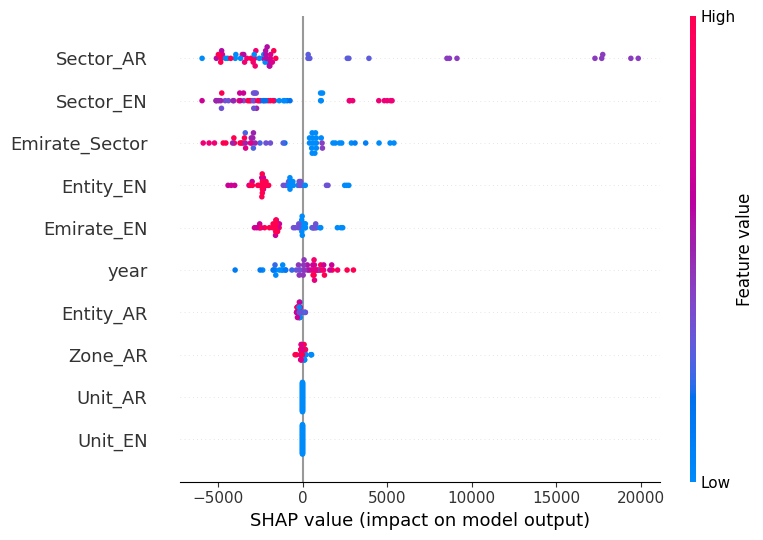

In [16]:
# Save Best Model and Scaler
joblib.dump(best_model, 'best_electricity_forecast_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Feature Importance Analysis (SHAP)
if hasattr(best_model, 'feature_importances_'):
    shap_values = shap.TreeExplainer(best_model).shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)


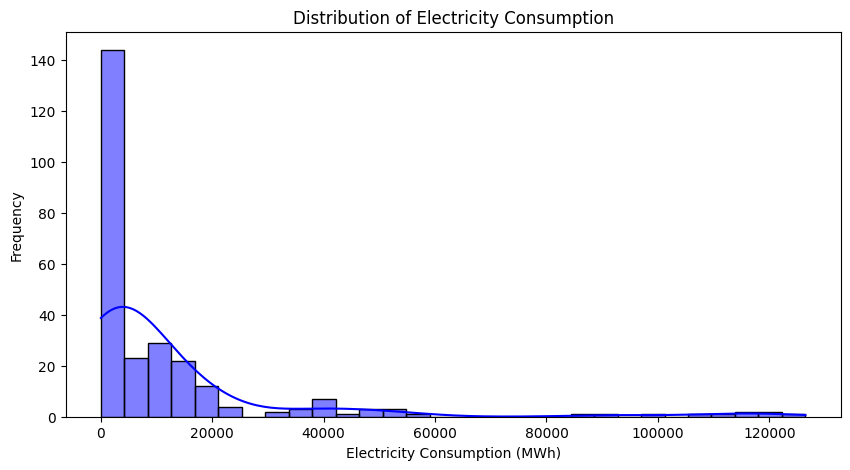

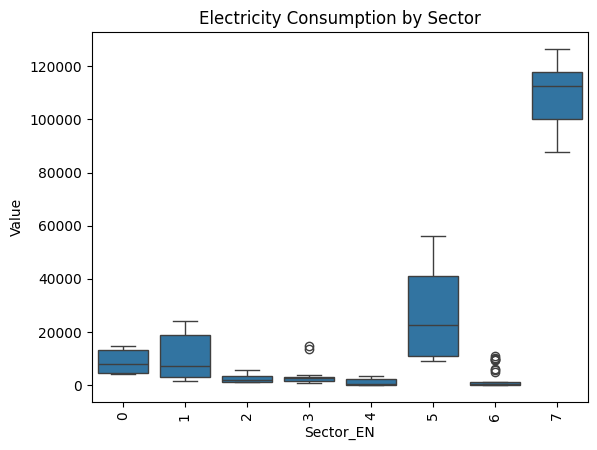

In [17]:
# Data Visualization
plt.figure(figsize=(10, 5))
sns.histplot(df['Value'], bins=30, kde=True, color='blue')
plt.title("Distribution of Electricity Consumption")
plt.xlabel("Electricity Consumption (MWh)")
plt.ylabel("Frequency")
plt.show()

sns.boxplot(x=df['Sector_EN'], y=df['Value'])
plt.xticks(rotation=90)
plt.title("Electricity Consumption by Sector")
plt.show()

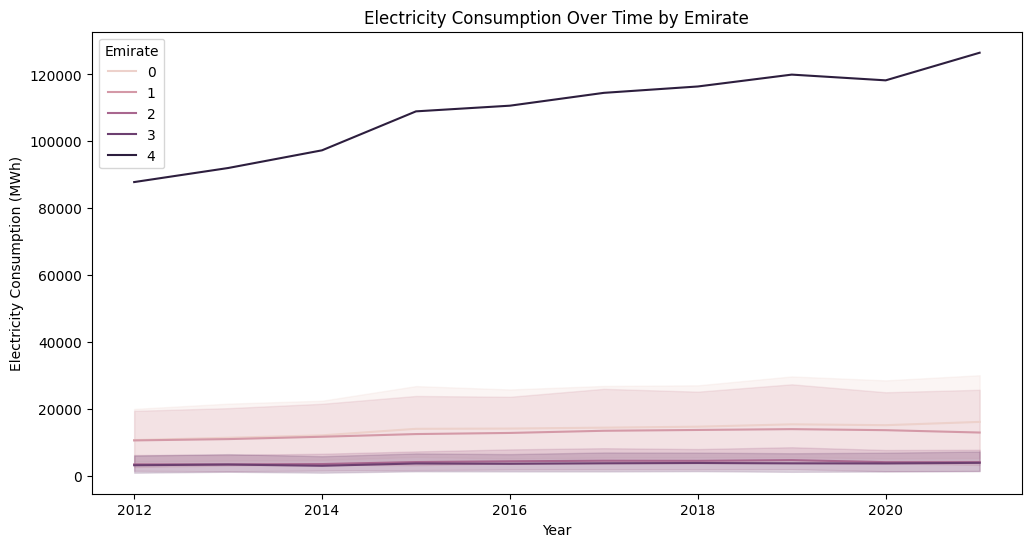

In [18]:
# Time Series Plot
df_sorted = df.sort_values(by='year')
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_sorted['year'], y=df_sorted['Value'], hue=df_sorted['Emirate_EN'])
plt.title("Electricity Consumption Over Time by Emirate")
plt.xlabel("Year")
plt.ylabel("Electricity Consumption (MWh)")
plt.legend(title="Emirate")
plt.show()

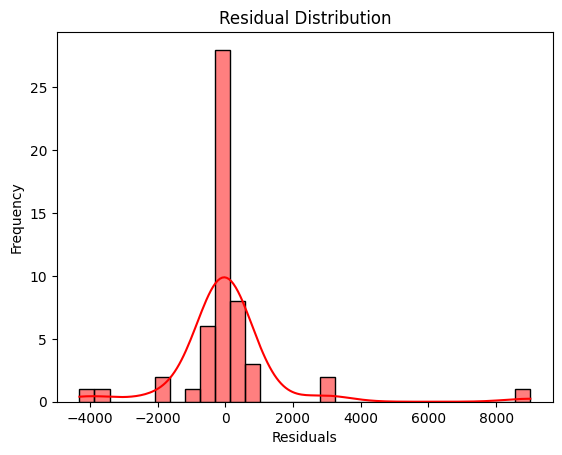

In [19]:
# Residual Plot
residuals = y_test - best_model.predict(X_test)
sns.histplot(residuals, bins=30, kde=True, color='red')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()